In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Data Preprocessing (Single Action Class)
# -----------------------------
base_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"  # base Task_B folder

action_class = "Bowling"  # Change to "Bowling" / "Fielding" / "Umpire"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Point ImageFolder to *only* the action class folder
train_ds = datasets.ImageFolder(f"{base_dir}/train/{action_class}", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/{action_class}", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/{action_class}", transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

print(f"Training only on: {action_class}")
print("Train classes:", train_ds.classes)
print("Train samples:", len(train_ds), 
      "Val samples:", len(val_ds), 
      "Test samples:", len(test_ds))

Training only on: Bowling
Train classes: ['fast_bowl', 'spin_bowl']
Train samples: 1710 Val samples: 432 Test samples: 549


In [2]:
print("Total training images:", len(train_ds))
print("Total validation images:", len(val_ds))
print("Total test images:", len(test_ds))

total_images = len(train_ds) + len(val_ds) + len(test_ds)
print("Total images in dataset:", total_images)


Total training images: 1710
Total validation images: 432
Total test images: 549
Total images in dataset: 2691


In [3]:
ignore_folder = "random_occlusion"

def count_images_ignore_folder(dataset, ignore_folder):
    count = 0
    for img_path, label in dataset.samples:
        # Skip if the image path contains the ignore_folder
        if ignore_folder not in img_path.split("/"):
            count += 1
    return count

train_count = count_images_ignore_folder(train_ds, ignore_folder)
val_count   = count_images_ignore_folder(val_ds, ignore_folder)
test_count  = count_images_ignore_folder(test_ds, ignore_folder)

total_count = train_count + val_count + test_count

print("Training images (excluding '{}'): {}".format(ignore_folder, train_count))
print("Validation images (excluding '{}'): {}".format(ignore_folder, val_count))
print("Test images (excluding '{}'): {}".format(ignore_folder, test_count))
print("Total images (excluding '{}'): {}".format(ignore_folder, total_count))


Training images (excluding 'random_occlusion'): 1520
Validation images (excluding 'random_occlusion'): 384
Test images (excluding 'random_occlusion'): 488
Total images (excluding 'random_occlusion'): 2392


In [4]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)


Training folders considered: {'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'lens_flare', 'motion_blur', 'blur', 'dirty_lens'}
Validation folders considered: {'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'lens_flare', 'motion_blur', 'blur', 'dirty_lens'}
Test folders considered: {'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'lens_flare', 'motion_blur', 'blur', 'dirty_lens'}


In [5]:
ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    # Keep only samples where ignore_folder is NOT in the path
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]  # Update targets accordingly
    return dataset

# Create original datasets
train_ds = datasets.ImageFolder(f"{base_dir}/train/Bowling", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Bowling", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Bowling", transform=transform)

# Filter out 'random_occlusion' folder
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Classes (will remain the same)
classes = train_ds.classes
print("Classes:", classes)

# Show counts
print("Final Training images:", len(train_ds))
print("Final Validation images:", len(val_ds))
print("Final Test images:", len(test_ds))
print("Total images after filtering:", len(train_ds) + len(val_ds) + len(test_ds))


Classes: ['fast_bowl', 'spin_bowl']
Final Training images: 1520
Final Validation images: 384
Final Test images: 488
Total images after filtering: 2392


In [6]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)


Training folders considered: {'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'lens_flare', 'motion_blur', 'blur', 'dirty_lens'}
Validation folders considered: {'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'lens_flare', 'motion_blur', 'blur', 'dirty_lens'}
Test folders considered: {'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'lens_flare', 'motion_blur', 'blur', 'dirty_lens'}


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import os
import tempfile

# -----------------------------
# 1. Data Preprocessing with Filtering (InceptionV3 - 299x299)
# -----------------------------
data_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"

# InceptionV3 requires 299x299 input size
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # InceptionV3 specific size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    """Filter out samples containing the ignore_folder in their path"""
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]
    return dataset

# Create and filter datasets
print("🔄 Loading and filtering datasets for InceptionV3...")
train_ds = datasets.ImageFolder(f"{data_dir}/train/Bowling", transform=transform)
val_ds   = datasets.ImageFolder(f"{data_dir}/val/Bowling", transform=transform)
test_ds  = datasets.ImageFolder(f"{data_dir}/test/Bowling", transform=transform)

# Apply filtering
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# Create DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Display information
classes = train_ds.classes
print(f"✅ Classes: {classes}")
print(f"📊 Dataset Statistics:")
print(f"│ Training images: {len(train_ds)}")
print(f"│ Validation images: {len(val_ds)}")
print(f"│ Test images: {len(test_ds)}")
print(f"│ Total images (after filtering): {len(train_ds) + len(val_ds) + len(test_ds)}")
print(f"│ Excluded folder: '{ignore_folder}'")
print(f"│ Number of classes: {len(classes)}")


🔄 Loading and filtering datasets for InceptionV3...
✅ Classes: ['fast_bowl', 'spin_bowl']
📊 Dataset Statistics:
│ Training images: 1520
│ Validation images: 384
│ Test images: 488
│ Total images (after filtering): 2392
│ Excluded folder: 'random_occlusion'
│ Number of classes: 2


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from tqdm import tqdm
import time
from torchvision import models
import tempfile
import os


# -----------------------------
# 2. Pretrained InceptionV3 Model
# -----------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load pretrained InceptionV3
print("🔄 Loading pretrained InceptionV3 from ImageNet...")
model = models.inception_v3(pretrained=True)

# InceptionV3 has auxiliary classifier - disable it for fine-tuning
model.aux_logits = False

# Replace final classification layer
num_features = model.fc.in_features  # Get input features (2048)
model.fc = nn.Linear(num_features, len(classes))  # Replace final layer
model = model.to(device)

print(f"✅ Model loaded with {len(classes)} output classes")

# Calculate model parameters and size
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Calculate model file size
with tempfile.NamedTemporaryFile(delete=False, suffix='.pth') as tmp_file:
    torch.save(model.state_dict(), tmp_file.name)
    model_size_mb = os.path.getsize(tmp_file.name) / (1024 * 1024)
    os.unlink(tmp_file.name)

print(f"📊 Total parameters: {total_params:,}")
print(f"📊 Trainable parameters: {trainable_params:,}")
print(f"📊 Model file size: {model_size_mb:.2f} MB")
print(f"📋 Model Architecture:")
print(f"│ Input size: (3, 299, 299)")  # InceptionV3 specific
print(f"│ InceptionV3 features: 2048")
print(f"│ Output classes: {len(classes)}")
print(f"│ Auxiliary classifier: Disabled")


Using device: cuda
🔄 Loading pretrained InceptionV3 from ImageNet...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 165MB/s] 


✅ Model loaded with 2 output classes
📊 Total parameters: 25,116,362
📊 Trainable parameters: 25,116,362
📊 Model file size: 96.14 MB
📋 Model Architecture:
│ Input size: (3, 299, 299)
│ InceptionV3 features: 2048
│ Output classes: 2
│ Auxiliary classifier: Disabled



📋 Training Configuration:
│ Model: InceptionV3 (pretrained)
│ Optimizer: Adam (lr=0.0001)
│ Loss Function: CrossEntropyLoss
│ Batch Size: 32
│ Device: cuda
│ Data: Filtered (excluding 'random_occlusion')

🚀 Starting InceptionV3 Fine-tuning for 50 epochs...

📈 Epoch 1/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:51<00:00,  1.08s/it, Loss=0.4550, Acc=0.7743]


✅ Training completed in 51.97s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:07<00:00,  1.51it/s, Loss=0.5013, Acc=0.7474]


✅ Validation completed in 7.96s
🌟 New best model found! Validation Loss: 0.5013

📊 Epoch 1 Summary:
│ Train Loss: 0.4550 | Train Acc: 0.7743
│ Val Loss:   0.5013 | Val Acc:   0.7474
│ Train Time: 51.97s | Val Time: 7.96s
│ Total Epoch Time: 59.93s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 2/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:33<00:00,  1.42it/s, Loss=0.0736, Acc=0.9809]


✅ Training completed in 33.82s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.85it/s, Loss=0.7558, Acc=0.7161]


✅ Validation completed in 4.22s

📊 Epoch 2 Summary:
│ Train Loss: 0.0736 | Train Acc: 0.9809
│ Val Loss:   0.7558 | Val Acc:   0.7161
│ Train Time: 33.82s | Val Time: 4.22s
│ Total Epoch Time: 38.05s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 3/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:34<00:00,  1.41it/s, Loss=0.0264, Acc=0.9928]


✅ Training completed in 34.16s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.80it/s, Loss=0.8734, Acc=0.6615]


✅ Validation completed in 4.29s

📊 Epoch 3 Summary:
│ Train Loss: 0.0264 | Train Acc: 0.9928
│ Val Loss:   0.8734 | Val Acc:   0.6615
│ Train Time: 34.16s | Val Time: 4.29s
│ Total Epoch Time: 38.46s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 4/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.37it/s, Loss=0.0123, Acc=0.9987]


✅ Training completed in 35.12s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.55it/s, Loss=0.7901, Acc=0.7161]


✅ Validation completed in 4.71s

📊 Epoch 4 Summary:
│ Train Loss: 0.0123 | Train Acc: 0.9987
│ Val Loss:   0.7901 | Val Acc:   0.7161
│ Train Time: 35.12s | Val Time: 4.71s
│ Total Epoch Time: 39.83s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 5/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.31it/s, Loss=0.0055, Acc=1.0000]


✅ Training completed in 36.52s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.63it/s, Loss=0.8065, Acc=0.7266]


✅ Validation completed in 4.56s

📊 Epoch 5 Summary:
│ Train Loss: 0.0055 | Train Acc: 1.0000
│ Val Loss:   0.8065 | Val Acc:   0.7266
│ Train Time: 36.52s | Val Time: 4.56s
│ Total Epoch Time: 41.08s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 6/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.32it/s, Loss=0.0025, Acc=1.0000]


✅ Training completed in 36.48s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.68it/s, Loss=0.8973, Acc=0.7188]


✅ Validation completed in 4.48s

📊 Epoch 6 Summary:
│ Train Loss: 0.0025 | Train Acc: 1.0000
│ Val Loss:   0.8973 | Val Acc:   0.7188
│ Train Time: 36.48s | Val Time: 4.48s
│ Total Epoch Time: 40.96s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 7/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:37<00:00,  1.28it/s, Loss=0.0021, Acc=1.0000]


✅ Training completed in 37.50s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.64it/s, Loss=1.0804, Acc=0.6875]


✅ Validation completed in 4.54s

📊 Epoch 7 Summary:
│ Train Loss: 0.0021 | Train Acc: 1.0000
│ Val Loss:   1.0804 | Val Acc:   0.6875
│ Train Time: 37.50s | Val Time: 4.54s
│ Total Epoch Time: 42.04s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 8/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.30it/s, Loss=0.0246, Acc=0.9941]


✅ Training completed in 36.98s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.61it/s, Loss=1.1603, Acc=0.7057]


✅ Validation completed in 4.60s

📊 Epoch 8 Summary:
│ Train Loss: 0.0246 | Train Acc: 0.9941
│ Val Loss:   1.1603 | Val Acc:   0.7057
│ Train Time: 36.98s | Val Time: 4.60s
│ Total Epoch Time: 41.58s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 9/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.31it/s, Loss=0.0174, Acc=0.9961]


✅ Training completed in 36.76s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.63it/s, Loss=0.8914, Acc=0.7266]


✅ Validation completed in 4.57s

📊 Epoch 9 Summary:
│ Train Loss: 0.0174 | Train Acc: 0.9961
│ Val Loss:   0.8914 | Val Acc:   0.7266
│ Train Time: 36.76s | Val Time: 4.57s
│ Total Epoch Time: 41.33s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 10/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.31it/s, Loss=0.0164, Acc=0.9967]


✅ Training completed in 36.69s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.79it/s, Loss=1.0761, Acc=0.7396]


✅ Validation completed in 4.31s

📊 Epoch 10 Summary:
│ Train Loss: 0.0164 | Train Acc: 0.9967
│ Val Loss:   1.0761 | Val Acc:   0.7396
│ Train Time: 36.69s | Val Time: 4.31s
│ Total Epoch Time: 41.00s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 11/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0249, Acc=0.9908]


✅ Training completed in 35.74s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.71it/s, Loss=1.1270, Acc=0.7135]


✅ Validation completed in 4.44s

📊 Epoch 11 Summary:
│ Train Loss: 0.0249 | Train Acc: 0.9908
│ Val Loss:   1.1270 | Val Acc:   0.7135
│ Train Time: 35.74s | Val Time: 4.44s
│ Total Epoch Time: 40.18s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 12/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.33it/s, Loss=0.0084, Acc=0.9974]


✅ Training completed in 35.97s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.78it/s, Loss=1.1557, Acc=0.6979]


✅ Validation completed in 4.32s

📊 Epoch 12 Summary:
│ Train Loss: 0.0084 | Train Acc: 0.9974
│ Val Loss:   1.1557 | Val Acc:   0.6979
│ Train Time: 35.97s | Val Time: 4.32s
│ Total Epoch Time: 40.30s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 13/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0146, Acc=0.9974]


✅ Training completed in 35.70s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.76it/s, Loss=1.2099, Acc=0.7734]


✅ Validation completed in 4.35s

📊 Epoch 13 Summary:
│ Train Loss: 0.0146 | Train Acc: 0.9974
│ Val Loss:   1.2099 | Val Acc:   0.7734
│ Train Time: 35.70s | Val Time: 4.35s
│ Total Epoch Time: 40.06s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 14/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=0.0221, Acc=0.9928]


✅ Training completed in 35.67s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.53it/s, Loss=0.9321, Acc=0.7604]


✅ Validation completed in 4.74s

📊 Epoch 14 Summary:
│ Train Loss: 0.0221 | Train Acc: 0.9928
│ Val Loss:   0.9321 | Val Acc:   0.7604
│ Train Time: 35.67s | Val Time: 4.74s
│ Total Epoch Time: 40.42s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 15/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=0.0196, Acc=0.9934]


✅ Training completed in 35.65s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.82it/s, Loss=1.1663, Acc=0.7318]


✅ Validation completed in 4.27s

📊 Epoch 15 Summary:
│ Train Loss: 0.0196 | Train Acc: 0.9934
│ Val Loss:   1.1663 | Val Acc:   0.7318
│ Train Time: 35.65s | Val Time: 4.27s
│ Total Epoch Time: 39.92s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 16/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0108, Acc=0.9974]


✅ Training completed in 35.80s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.81it/s, Loss=1.0203, Acc=0.7188]


✅ Validation completed in 4.27s

📊 Epoch 16 Summary:
│ Train Loss: 0.0108 | Train Acc: 0.9974
│ Val Loss:   1.0203 | Val Acc:   0.7188
│ Train Time: 35.80s | Val Time: 4.27s
│ Total Epoch Time: 40.08s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 17/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.0029, Acc=0.9993]


✅ Training completed in 36.08s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.77it/s, Loss=1.2384, Acc=0.7031]


✅ Validation completed in 4.33s

📊 Epoch 17 Summary:
│ Train Loss: 0.0029 | Train Acc: 0.9993
│ Val Loss:   1.2384 | Val Acc:   0.7031
│ Train Time: 36.08s | Val Time: 4.33s
│ Total Epoch Time: 40.42s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 18/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0009, Acc=1.0000]


✅ Training completed in 35.81s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.80it/s, Loss=1.2795, Acc=0.7057]


✅ Validation completed in 4.29s

📊 Epoch 18 Summary:
│ Train Loss: 0.0009 | Train Acc: 1.0000
│ Val Loss:   1.2795 | Val Acc:   0.7057
│ Train Time: 35.81s | Val Time: 4.29s
│ Total Epoch Time: 40.11s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 19/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.0009, Acc=1.0000]


✅ Training completed in 36.09s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.67it/s, Loss=1.2022, Acc=0.7188]


✅ Validation completed in 4.50s

📊 Epoch 19 Summary:
│ Train Loss: 0.0009 | Train Acc: 1.0000
│ Val Loss:   1.2022 | Val Acc:   0.7188
│ Train Time: 36.09s | Val Time: 4.50s
│ Total Epoch Time: 40.60s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 20/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.33it/s, Loss=0.0007, Acc=1.0000]


✅ Training completed in 35.98s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.80it/s, Loss=1.3344, Acc=0.7135]


✅ Validation completed in 4.30s

📊 Epoch 20 Summary:
│ Train Loss: 0.0007 | Train Acc: 1.0000
│ Val Loss:   1.3344 | Val Acc:   0.7135
│ Train Time: 35.98s | Val Time: 4.30s
│ Total Epoch Time: 40.28s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 21/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0007, Acc=1.0000]


✅ Training completed in 35.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.81it/s, Loss=1.2416, Acc=0.7057]


✅ Validation completed in 4.27s

📊 Epoch 21 Summary:
│ Train Loss: 0.0007 | Train Acc: 1.0000
│ Val Loss:   1.2416 | Val Acc:   0.7057
│ Train Time: 35.72s | Val Time: 4.27s
│ Total Epoch Time: 40.00s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 22/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=0.0042, Acc=0.9987]


✅ Training completed in 35.66s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.82it/s, Loss=1.1605, Acc=0.7005]


✅ Validation completed in 4.27s

📊 Epoch 22 Summary:
│ Train Loss: 0.0042 | Train Acc: 0.9987
│ Val Loss:   1.1605 | Val Acc:   0.7005
│ Train Time: 35.66s | Val Time: 4.27s
│ Total Epoch Time: 39.93s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 23/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0038, Acc=0.9987]


✅ Training completed in 35.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.79it/s, Loss=1.0882, Acc=0.7109]


✅ Validation completed in 4.30s

📊 Epoch 23 Summary:
│ Train Loss: 0.0038 | Train Acc: 0.9987
│ Val Loss:   1.0882 | Val Acc:   0.7109
│ Train Time: 35.72s | Val Time: 4.30s
│ Total Epoch Time: 40.03s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 24/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0029, Acc=0.9993]


✅ Training completed in 35.86s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.77it/s, Loss=1.2709, Acc=0.7214]


✅ Validation completed in 4.35s

📊 Epoch 24 Summary:
│ Train Loss: 0.0029 | Train Acc: 0.9993
│ Val Loss:   1.2709 | Val Acc:   0.7214
│ Train Time: 35.86s | Val Time: 4.35s
│ Total Epoch Time: 40.21s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 25/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0011, Acc=1.0000]


✅ Training completed in 35.86s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.75it/s, Loss=1.1554, Acc=0.6953]


✅ Validation completed in 4.37s

📊 Epoch 25 Summary:
│ Train Loss: 0.0011 | Train Acc: 1.0000
│ Val Loss:   1.1554 | Val Acc:   0.6953
│ Train Time: 35.86s | Val Time: 4.37s
│ Total Epoch Time: 40.24s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 26/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0007, Acc=1.0000]


✅ Training completed in 35.93s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.69it/s, Loss=1.2744, Acc=0.6927]


✅ Validation completed in 4.46s

📊 Epoch 26 Summary:
│ Train Loss: 0.0007 | Train Acc: 1.0000
│ Val Loss:   1.2744 | Val Acc:   0.6927
│ Train Time: 35.93s | Val Time: 4.46s
│ Total Epoch Time: 40.40s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 27/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0004, Acc=1.0000]


✅ Training completed in 35.75s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.75it/s, Loss=1.2435, Acc=0.6927]


✅ Validation completed in 4.36s

📊 Epoch 27 Summary:
│ Train Loss: 0.0004 | Train Acc: 1.0000
│ Val Loss:   1.2435 | Val Acc:   0.6927
│ Train Time: 35.75s | Val Time: 4.36s
│ Total Epoch Time: 40.12s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 28/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0005, Acc=1.0000]


✅ Training completed in 35.93s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.76it/s, Loss=1.2729, Acc=0.7135]


✅ Validation completed in 4.35s

📊 Epoch 28 Summary:
│ Train Loss: 0.0005 | Train Acc: 1.0000
│ Val Loss:   1.2729 | Val Acc:   0.7135
│ Train Time: 35.93s | Val Time: 4.35s
│ Total Epoch Time: 40.28s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 29/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.71s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.78it/s, Loss=1.4210, Acc=0.7031]


✅ Validation completed in 4.33s

📊 Epoch 29 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   1.4210 | Val Acc:   0.7031
│ Train Time: 35.71s | Val Time: 4.33s
│ Total Epoch Time: 40.04s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 30/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.58s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.76it/s, Loss=1.2842, Acc=0.7083]


✅ Validation completed in 4.35s

📊 Epoch 30 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   1.2842 | Val Acc:   0.7083
│ Train Time: 35.58s | Val Time: 4.35s
│ Total Epoch Time: 39.93s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 31/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.81s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.82it/s, Loss=1.2857, Acc=0.7135]


✅ Validation completed in 4.26s

📊 Epoch 31 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   1.2857 | Val Acc:   0.7135
│ Train Time: 35.81s | Val Time: 4.26s
│ Total Epoch Time: 40.08s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 32/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.88s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.78it/s, Loss=1.3381, Acc=0.7109]


✅ Validation completed in 4.32s

📊 Epoch 32 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.3381 | Val Acc:   0.7109
│ Train Time: 35.88s | Val Time: 4.32s
│ Total Epoch Time: 40.21s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 33/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.83s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.83it/s, Loss=1.2980, Acc=0.7109]


✅ Validation completed in 4.25s

📊 Epoch 33 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2980 | Val Acc:   0.7109
│ Train Time: 35.83s | Val Time: 4.25s
│ Total Epoch Time: 40.08s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 34/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.32it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 36.24s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.78it/s, Loss=1.3044, Acc=0.7057]


✅ Validation completed in 4.33s

📊 Epoch 34 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.3044 | Val Acc:   0.7057
│ Train Time: 36.24s | Val Time: 4.33s
│ Total Epoch Time: 40.57s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 35/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0003, Acc=1.0000]


✅ Training completed in 35.90s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.77it/s, Loss=1.3532, Acc=0.7135]


✅ Validation completed in 4.33s

📊 Epoch 35 Summary:
│ Train Loss: 0.0003 | Train Acc: 1.0000
│ Val Loss:   1.3532 | Val Acc:   0.7135
│ Train Time: 35.90s | Val Time: 4.33s
│ Total Epoch Time: 40.23s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 36/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.87s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.82it/s, Loss=1.3229, Acc=0.7109]


✅ Validation completed in 4.26s

📊 Epoch 36 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.3229 | Val Acc:   0.7109
│ Train Time: 35.87s | Val Time: 4.26s
│ Total Epoch Time: 40.13s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 37/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.89s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.76it/s, Loss=1.3026, Acc=0.7188]


✅ Validation completed in 4.35s

📊 Epoch 37 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.3026 | Val Acc:   0.7188
│ Train Time: 35.89s | Val Time: 4.35s
│ Total Epoch Time: 40.25s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 38/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.33it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.99s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.82it/s, Loss=1.2651, Acc=0.7240]


✅ Validation completed in 4.26s

📊 Epoch 38 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2651 | Val Acc:   0.7240
│ Train Time: 35.99s | Val Time: 4.26s
│ Total Epoch Time: 40.26s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 39/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.76s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.77it/s, Loss=1.2733, Acc=0.7188]


✅ Validation completed in 4.33s

📊 Epoch 39 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2733 | Val Acc:   0.7188
│ Train Time: 35.76s | Val Time: 4.33s
│ Total Epoch Time: 40.09s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 40/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.88s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.79it/s, Loss=1.2490, Acc=0.7109]


✅ Validation completed in 4.31s

📊 Epoch 40 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2490 | Val Acc:   0.7109
│ Train Time: 35.88s | Val Time: 4.31s
│ Total Epoch Time: 40.19s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 41/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.73s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.78it/s, Loss=1.2908, Acc=0.7135]


✅ Validation completed in 4.33s

📊 Epoch 41 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2908 | Val Acc:   0.7135
│ Train Time: 35.73s | Val Time: 4.33s
│ Total Epoch Time: 40.06s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 42/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.85s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.83it/s, Loss=1.2904, Acc=0.7214]


✅ Validation completed in 4.25s

📊 Epoch 42 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2904 | Val Acc:   0.7214
│ Train Time: 35.85s | Val Time: 4.25s
│ Total Epoch Time: 40.11s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 43/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.90s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.76it/s, Loss=1.3182, Acc=0.7214]


✅ Validation completed in 4.36s

📊 Epoch 43 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.3182 | Val Acc:   0.7214
│ Train Time: 35.90s | Val Time: 4.36s
│ Total Epoch Time: 40.26s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 44/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.81s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.79it/s, Loss=1.2822, Acc=0.7266]


✅ Validation completed in 4.30s

📊 Epoch 44 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2822 | Val Acc:   0.7266
│ Train Time: 35.81s | Val Time: 4.30s
│ Total Epoch Time: 40.11s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 45/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.33it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.97s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.77it/s, Loss=1.3048, Acc=0.7188]


✅ Validation completed in 4.35s

📊 Epoch 45 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   1.3048 | Val Acc:   0.7188
│ Train Time: 35.97s | Val Time: 4.35s
│ Total Epoch Time: 40.32s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 46/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.75s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.78it/s, Loss=1.1836, Acc=0.7396]


✅ Validation completed in 4.32s

📊 Epoch 46 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.1836 | Val Acc:   0.7396
│ Train Time: 35.75s | Val Time: 4.32s
│ Total Epoch Time: 40.07s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 47/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.96s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.79it/s, Loss=1.2140, Acc=0.7266]


✅ Validation completed in 4.31s

📊 Epoch 47 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2140 | Val Acc:   0.7266
│ Train Time: 35.96s | Val Time: 4.31s
│ Total Epoch Time: 40.27s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 48/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.70s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.79it/s, Loss=1.2199, Acc=0.7266]


✅ Validation completed in 4.31s

📊 Epoch 48 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2199 | Val Acc:   0.7266
│ Train Time: 35.70s | Val Time: 4.31s
│ Total Epoch Time: 40.01s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 49/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.84s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.75it/s, Loss=1.1881, Acc=0.7344]


✅ Validation completed in 4.38s

📊 Epoch 49 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.1881 | Val Acc:   0.7344
│ Train Time: 35.84s | Val Time: 4.38s
│ Total Epoch Time: 40.22s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 50/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.94s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:04<00:00,  2.69it/s, Loss=1.2174, Acc=0.7474]


✅ Validation completed in 4.47s

📊 Epoch 50 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   1.2174 | Val Acc:   0.7474
│ Train Time: 35.94s | Val Time: 4.47s
│ Total Epoch Time: 40.41s
│ Best Val Loss: 0.5013 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

💾 Best model saved as 'best_cricket_inceptionv3_filtered.pth'
📊 Best model stats:
│ Best Epoch: 1
│ Best Val Loss: 0.5013
│ Best Val Acc: 0.7474

💾 Training history saved to 'cricket_inceptionv3_filtered_history_pretrained.csv'

🎉 InceptionV3 Fine-tuning Complete!
Total Training Time: 2031.77s (33.9 minutes)
Average Epoch Time: 40.64s

🧪 Loading Best Model for Testing...
✅ Best model from epoch 1 loaded successfully!


Testing: 100%|██████████████████████████████| 16/16 [00:10<00:00,  1.52it/s]


✅ Testing completed in 10.54s

📋 Classification Report:
              precision    recall  f1-score   support

   fast_bowl       0.77      0.83      0.80       304
   spin_bowl       0.67      0.60      0.63       184

    accuracy                           0.74       488
   macro avg       0.72      0.71      0.72       488
weighted avg       0.74      0.74      0.74       488

🎯 Test Accuracy: 0.7398

📊 Cricket Classification Performance (InceptionV3 - Filtered Data):
│ Best Validation Loss: 0.5013 (Epoch 1)
│ Best Validation Acc:  0.7474 (Epoch 1)
│ Final Test Accuracy:  0.7398
│ Val-Test Gap:         0.0076
│ Data Filtering: Excluded 'random_occlusion' folder

💾 Files saved:
│ best_cricket_inceptionv3_filtered.pth - Best model weights
│ cricket_inceptionv3_filtered_history.csv - Training metrics


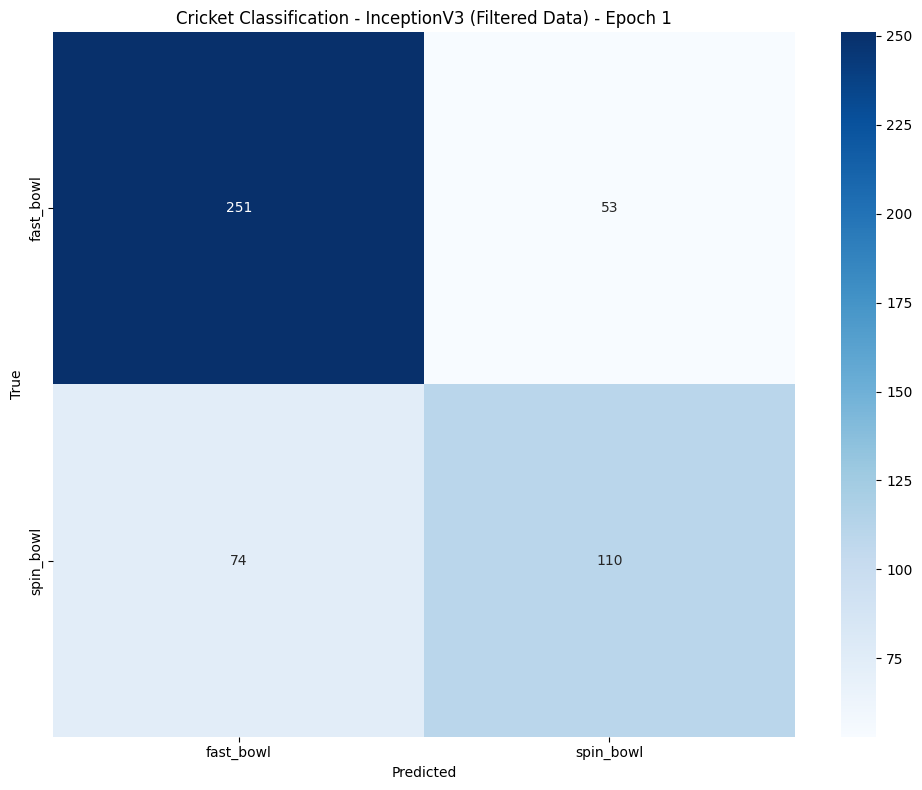

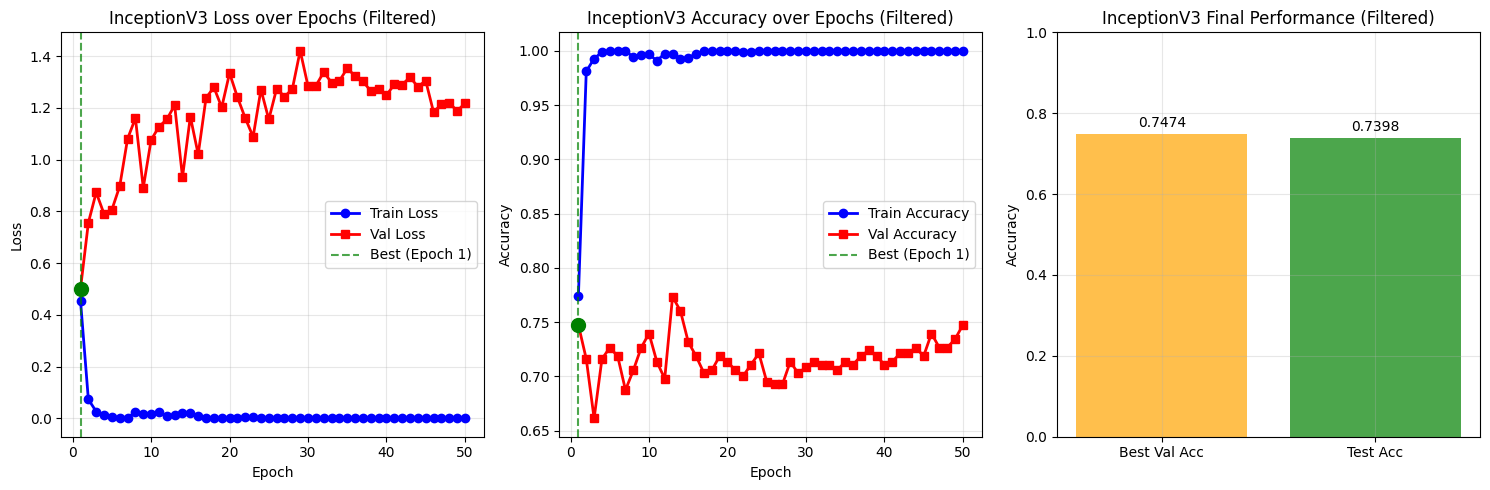


⏰ Final Timing Summary:
│ Total Training: 2031.77s (33.9 min)
│ Average per Epoch: 40.64s
│ Testing Time: 10.54s
│ Total Runtime: 2042.32s

🏗️ InceptionV3 + Filtered Data Benefits:
│ Clean dataset: 'random_occlusion' folder excluded
│ Multi-scale features: Inception modules with multiple filter sizes
│ High resolution: 299x299 input captures more detail
│ ImageNet pretrained: Leverages powerful feature representations
│ Optimized for quality: Should achieve excellent cricket classification


In [9]:

# -----------------------------
# 3. Training Setup
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Lower LR for fine-tuning

print(f"\n📋 Training Configuration:")
print(f"│ Model: InceptionV3 (pretrained)")
print(f"│ Optimizer: Adam (lr={optimizer.param_groups[0]['lr']})")
print(f"│ Loss Function: CrossEntropyLoss")
print(f"│ Batch Size: 32")
print(f"│ Device: {device}")
print(f"│ Data: Filtered (excluding '{ignore_folder}')")

# -----------------------------
# 4. Training Loop with Model Saving
# -----------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epoch_times = []
epochs = 50

# Initialize best model tracking (using val_loss for fine-tuning)
best_val_loss = float('inf')
best_model_state = None
best_epoch = 0
best_val_acc = 0.0

print(f"\n🚀 Starting InceptionV3 Fine-tuning for {epochs} epochs...")
print("=" * 80)
total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()
    
    print(f"\n📈 Epoch {epoch+1}/{epochs}")
    print("-" * 50)
    
    # Training Phase
    print("🔄 Training Phase...")
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    train_pbar = tqdm(train_loader, desc="Training", 
                     bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    train_phase_start = time.time()
    
    for batch_idx, (imgs, labels) in enumerate(train_pbar):
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        current_acc = correct / total
        train_pbar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{current_acc:.4f}'
        })
        
        if device.type == 'cuda' and batch_idx % 10 == 0:
            gpu_memory = torch.cuda.memory_allocated() / 1024**3
            train_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}',
                'GPU': f'{gpu_memory:.1f}GB'
            })
    
    train_phase_time = time.time() - train_phase_start
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"✅ Training completed in {train_phase_time:.2f}s")
    
    # Validation Phase
    print("🔍 Validation Phase...")
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    val_phase_start = time.time()
    val_pbar = tqdm(val_loader, desc="Validation", 
                   bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    with torch.no_grad():
        for batch_idx, (imgs, labels) in enumerate(val_pbar):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            current_acc = correct / total
            val_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}'
            })
    
    val_phase_time = time.time() - val_phase_start
    val_loss = running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"✅ Validation completed in {val_phase_time:.2f}s")
    
    # Check if this is the best model (using val_loss for fine-tuning)
    is_best = val_loss < best_val_loss
    if is_best:
        best_val_loss = val_loss
        best_val_acc = val_acc
        best_epoch = epoch + 1
        best_model_state = model.state_dict().copy()
        print(f"🌟 New best model found! Validation Loss: {val_loss:.4f}")
    
    # Epoch Summary
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f"\n📊 Epoch {epoch+1} Summary:")
    print(f"│ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"│ Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.4f}")
    print(f"│ Train Time: {train_phase_time:.2f}s | Val Time: {val_phase_time:.2f}s")
    print(f"│ Total Epoch Time: {epoch_time:.2f}s")
    print(f"│ Best Val Loss: {best_val_loss:.4f} (Epoch {best_epoch})")
    
    if device.type == 'cuda':
        print(f"│ GPU Memory: {torch.cuda.memory_allocated()/1024**3:.1f}GB / {torch.cuda.memory_reserved()/1024**3:.1f}GB")
    
    print("=" * 80)

total_training_time = time.time() - total_start_time

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'best_cricket_inceptionv3_filtered_pretrained.pth')
    print(f"\n💾 Best model saved as 'best_cricket_inceptionv3_filtered.pth'")
    print(f"📊 Best model stats:")
    print(f"│ Best Epoch: {best_epoch}")
    print(f"│ Best Val Loss: {best_val_loss:.4f}")
    print(f"│ Best Val Acc: {best_val_acc:.4f}")

# Save training history
history_data = {
    'epoch': list(range(1, epochs+1)),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'epoch_time': epoch_times
}

history_df = pd.DataFrame(history_data)
history_df.to_csv('cricket_inceptionv3_filtered_history_pretrained.csv', index=False)
print("\n💾 Training history saved to 'cricket_inceptionv3_filtered_history_pretrained.csv'")

print(f"\n🎉 InceptionV3 Fine-tuning Complete!")
print(f"Total Training Time: {total_training_time:.2f}s ({total_training_time/60:.1f} minutes)")
print(f"Average Epoch Time: {np.mean(epoch_times):.2f}s")

# -----------------------------
# 5. Load Best Model and Test
# -----------------------------
print(f"\n🧪 Loading Best Model for Testing...")
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"✅ Best model from epoch {best_epoch} loaded successfully!")

test_start_time = time.time()
y_true, y_pred = [], []
model.eval()
test_pbar = tqdm(test_loader, desc="Testing", 
                bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')

with torch.no_grad():
    for imgs, labels in test_pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_time = time.time() - test_start_time
test_accuracy = accuracy_score(y_true, y_pred)

print(f"✅ Testing completed in {test_time:.2f}s")
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))
print(f"🎯 Test Accuracy: {test_accuracy:.4f}")

# Performance Summary
print(f"\n📊 Cricket Classification Performance (InceptionV3 - Filtered Data):")
print(f"│ Best Validation Loss: {best_val_loss:.4f} (Epoch {best_epoch})")
print(f"│ Best Validation Acc:  {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"│ Final Test Accuracy:  {test_accuracy:.4f}")
print(f"│ Val-Test Gap:         {abs(best_val_acc - test_accuracy):.4f}")
print(f"│ Data Filtering: Excluded '{ignore_folder}' folder")

print(f"\n💾 Files saved:")
print(f"│ best_cricket_inceptionv3_filtered.pth - Best model weights")
print(f"│ cricket_inceptionv3_filtered_history.csv - Training metrics")

# -----------------------------
# 6. Visualizations
# -----------------------------
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Cricket Classification - InceptionV3 (Filtered Data) - Epoch {best_epoch}")
plt.tight_layout()
plt.show()

# Training Curves
plt.figure(figsize=(15, 5))

# Loss Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label="Train Loss", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_losses, 'r-', label="Val Loss", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_loss], color='green', s=100, zorder=5)
plt.legend()
plt.title("InceptionV3 Loss over Epochs (Filtered)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, epochs+1), train_accs, 'b-', label="Train Accuracy", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_accs, 'r-', label="Val Accuracy", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_acc], color='green', s=100, zorder=5)
plt.legend()
plt.title("InceptionV3 Accuracy over Epochs (Filtered)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

# Final Performance
plt.subplot(1, 3, 3)
metrics = ['Best Val Acc', 'Test Acc']
values = [best_val_acc, test_accuracy]
colors = ['orange', 'green']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title("InceptionV3 Final Performance (Filtered)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Final Summary
print(f"\n⏰ Final Timing Summary:")
print(f"│ Total Training: {total_training_time:.2f}s ({total_training_time/60:.1f} min)")
print(f"│ Average per Epoch: {np.mean(epoch_times):.2f}s")
print(f"│ Testing Time: {test_time:.2f}s")
print(f"│ Total Runtime: {total_training_time + test_time:.2f}s")

# Model and Data Info
print(f"\n🏗️ InceptionV3 + Filtered Data Benefits:")
print(f"│ Clean dataset: '{ignore_folder}' folder excluded")
print(f"│ Multi-scale features: Inception modules with multiple filter sizes")
print(f"│ High resolution: 299x299 input captures more detail")
print(f"│ ImageNet pretrained: Leverages powerful feature representations")
print(f"│ Optimized for quality: Should achieve excellent cricket classification")